In [1]:
# Tensorflow and Keras
from tensorflow import keras
import pandas as pd
#Numpy and MPL
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
(X_train_full, Y_train_full), (X_test, Y_test) = keras.datasets.mnist.load_data()

print(X_train_full.shape)
print(Y_train_full.shape)

X_valid, X_train = X_train_full[:5000]/255.0, X_train_full[5000:]/255.0
Y_valid, Y_train = Y_train_full[:5000], Y_train_full[5000:]

X_test = X_test/255.0

(60000, 28, 28)
(60000,)


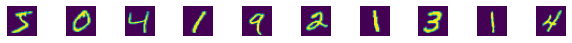

In [3]:
fig, ax = plt.subplots(1, 10, figsize=(10,2))

for i in range(10):
    ax[i].imshow(X_train_full[i])
    ax[i].axis('off')
    plt.subplots_adjust(wspace=1) 

plt.show()

In [4]:
checkpoint = keras.callbacks.ModelCheckpoint("dense_model_mnist.h5", save_best_only=True)
early_stopping = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)
reduceLr = keras.callbacks.ReduceLROnPlateau()

model = keras.Sequential([
  keras.layers.Flatten(input_shape=[28, 28]),
  keras.layers.BatchNormalization(),
  keras.layers.Dense(75, activation='elu', kernel_initializer="he_normal"),
    
  keras.layers.Dense(50, activation='relu'),
  keras.layers.BatchNormalization(),
  keras.layers.Dropout(0.1),
    
  keras.layers.Dense(25, activation='relu'),
  keras.layers.BatchNormalization(),
  keras.layers.Dropout(0.1),

  keras.layers.Dense(10, activation='softmax')
])


model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.Nadam(learning_rate=1e-4),
              metrics=["accuracy"])

history = model.fit(X_train, 
                    Y_train, 
                    epochs=10, 
                    validation_data=(X_valid, Y_valid),
                    callbacks=[checkpoint, early_stopping, reduceLr])

Epoch 1/10
1719/1719 [==============================] - 23s 12ms/step - loss: 0.9962 - accuracy: 0.7088 - val_loss: 0.4114 - val_accuracy: 0.8936
Epoch 2/10
1719/1719 [==============================] - 21s 12ms/step - loss: 0.4572 - accuracy: 0.8767 - val_loss: 0.2566 - val_accuracy: 0.9276
Epoch 3/10
1719/1719 [==============================] - 21s 12ms/step - loss: 0.3423 - accuracy: 0.9043 - val_loss: 0.2028 - val_accuracy: 0.9422
Epoch 4/10
1719/1719 [==============================] - 21s 12ms/step - loss: 0.2841 - accuracy: 0.9193 - val_loss: 0.1776 - val_accuracy: 0.9482
Epoch 5/10
1719/1719 [==============================] - 21s 12ms/step - loss: 0.2462 - accuracy: 0.9291 - val_loss: 0.1611 - val_accuracy: 0.9526
Epoch 6/10
1719/1719 [==============================] - 21s 12ms/step - loss: 0.2223 - accuracy: 0.9349 - val_loss: 0.1486 - val_accuracy: 0.9540
Epoch 7/10
1719/1719 [==============================] - 21s 12ms/step - loss: 0.2010 - accuracy: 0.9413 - val_loss: 0.1397 -

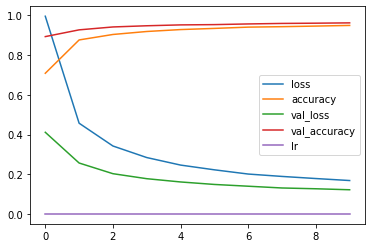

313/313 [==============================] - 1s 2ms/step - loss: 0.1305 - accuracy: 0.9634


[0.13048604130744934, 0.9634000062942505]

In [5]:
pd.DataFrame(history.history).plot()
plt.show()

model.evaluate(X_test, Y_test)

In [6]:
(X_train_cifar10, Y_train_cifar10), (X_test_cifar10, Y_test_cifar10) = keras.datasets.cifar10.load_data()

print(X_train_cifar10.shape)
print(Y_train_cifar10.shape)

X_valid_cifar10, X_train_cifar10 = X_train_cifar10[:5000]/255.0, X_train_cifar10[5000:]/255.0
Y_valid_cifar10, Y_train_cifar10 = Y_train_cifar10[:5000], Y_train_cifar10[5000:]

X_test_cifar10 = X_test_cifar10/255.0

(50000, 32, 32, 3)
(50000, 1)


In [7]:
(X_train_cifar100, Y_train_cifar100), (X_test_cifar100, Y_test_cifar100) = keras.datasets.cifar100.load_data()

print(X_train_cifar100.shape)
print(Y_train_cifar100.shape)

X_valid_cifar100, X_train_cifar100 = X_train_cifar100[:5000]/255.0, X_train_cifar100[5000:]/255.0
Y_valid_cifar100, Y_train_cifar100 = Y_train_cifar100[:5000], Y_train_cifar100[5000:]

X_test_cifar100 = X_test_cifar100/255.0

(50000, 32, 32, 3)
(50000, 1)


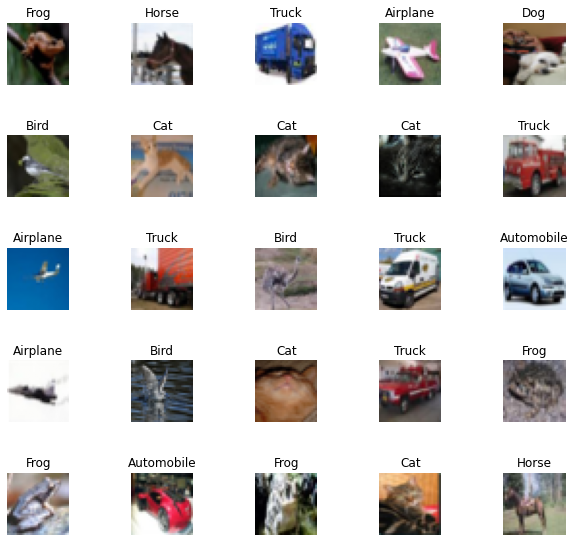

In [8]:
fig, ax = plt.subplots(5, 5, figsize=(10, 10))
ax = ax.ravel()

# Labels come as numbers of [0..9], so here are the class names for humans
class_names = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

for i in range(25):
    ax[i].imshow(X_train_cifar10[i])
    ax[i].set_title(class_names[Y_train_cifar10[i][0]])
    ax[i].axis('off')
    plt.subplots_adjust(wspace=1) 

plt.show()

In [9]:
checkpoint = keras.callbacks.ModelCheckpoint("simple_dense.h5", save_best_only=True)
early_stopping = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)
reduceLr = keras.callbacks.ReduceLROnPlateau()

model = keras.Sequential([
  keras.layers.Flatten(input_shape=[32, 32, 3]),
  keras.layers.BatchNormalization(),
  keras.layers.Dense(75),
    
  keras.layers.Dense((50), activation='elu'),
  keras.layers.BatchNormalization(),
  keras.layers.Dropout(0.1),
    
  keras.layers.Dense((50), activation='elu'),
  keras.layers.BatchNormalization(),
  keras.layers.Dropout(0.1),
    
  keras.layers.Dense(10, activation='softmax')
])

model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.Adam(),
              metrics=["accuracy"])

history = model.fit(X_train_cifar10, 
                    Y_train_cifar10, 
                    epochs=60, 
                    validation_data=(X_valid_cifar10, Y_valid_cifar10),
                    callbacks=[checkpoint, early_stopping, reduceLr])

Epoch 1/60
1407/1407 [==============================] - 9s 6ms/step - loss: 1.8266 - accuracy: 0.3518 - val_loss: 1.5916 - val_accuracy: 0.4312
Epoch 2/60
1407/1407 [==============================] - 8s 6ms/step - loss: 1.6497 - accuracy: 0.4111 - val_loss: 1.5348 - val_accuracy: 0.4490
Epoch 3/60
1407/1407 [==============================] - 8s 6ms/step - loss: 1.5892 - accuracy: 0.4342 - val_loss: 1.4830 - val_accuracy: 0.4696
Epoch 4/60
1407/1407 [==============================] - 8s 6ms/step - loss: 1.5553 - accuracy: 0.4487 - val_loss: 1.4763 - val_accuracy: 0.4750
Epoch 5/60
1407/1407 [==============================] - 8s 6ms/step - loss: 1.5226 - accuracy: 0.4583 - val_loss: 1.4431 - val_accuracy: 0.4838
Epoch 6/60
1407/1407 [==============================] - 8s 6ms/step - loss: 1.4976 - accuracy: 0.4653 - val_loss: 1.4285 - val_accuracy: 0.4904
Epoch 7/60
1407/1407 [==============================] - 8s 6ms/step - loss: 1.4807 - accuracy: 0.4740 - val_loss: 1.4134 - val_accuracy:

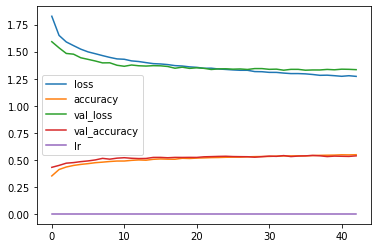

313/313 [==============================] - 1s 2ms/step - loss: 1.3394 - accuracy: 0.5202


[1.3394205570220947, 0.5202000141143799]

In [10]:
pd.DataFrame(history.history).plot()
plt.show()

model.evaluate(X_test_cifar10, Y_test_cifar10)

In [11]:
checkpoint = keras.callbacks.ModelCheckpoint("bigger_dense.h5", save_best_only=True)
early_stopping = keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)
reduceLr = keras.callbacks.ReduceLROnPlateau()

# Modify the model
model1 = keras.Sequential([
  keras.layers.Flatten(input_shape=[32, 32, 3]),
  keras.layers.BatchNormalization(),
  keras.layers.Dense(256, activation='relu', kernel_initializer="he_normal"),
    
  keras.layers.Dense(128, activation='relu'),
  keras.layers.BatchNormalization(),
  keras.layers.Dropout(0.1),

  keras.layers.Dense(100, activation='softmax')
])


model1.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.Adam(),
              metrics=["accuracy"])

history = model1.fit(X_train_cifar100, 
                    Y_train_cifar100, 
                    epochs=50, 
                    validation_data=(X_valid_cifar100, Y_valid_cifar100),
                    callbacks=[checkpoint, early_stopping, reduceLr])

Epoch 1/50
1407/1407 [==============================] - 7s 4ms/step - loss: 3.8827 - accuracy: 0.1175 - val_loss: 3.5964 - val_accuracy: 0.1636
Epoch 2/50
1407/1407 [==============================] - 6s 4ms/step - loss: 3.4838 - accuracy: 0.1801 - val_loss: 3.3571 - val_accuracy: 0.1998
Epoch 3/50
1407/1407 [==============================] - 6s 4ms/step - loss: 3.3073 - accuracy: 0.2096 - val_loss: 3.2958 - val_accuracy: 0.2112
Epoch 4/50
1407/1407 [==============================] - 6s 4ms/step - loss: 3.1890 - accuracy: 0.2327 - val_loss: 3.2145 - val_accuracy: 0.2328
Epoch 5/50
1407/1407 [==============================] - 6s 4ms/step - loss: 3.0943 - accuracy: 0.2483 - val_loss: 3.2080 - val_accuracy: 0.2366
Epoch 6/50
1407/1407 [==============================] - 6s 4ms/step - loss: 3.0028 - accuracy: 0.2638 - val_loss: 3.1636 - val_accuracy: 0.2474
Epoch 7/50
1407/1407 [==============================] - 6s 4ms/step - loss: 2.9177 - accuracy: 0.2816 - val_loss: 3.1424 - val_accuracy:

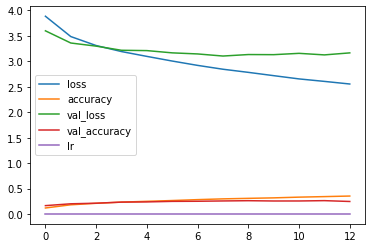

313/313 [==============================] - 1s 2ms/step - loss: 3.0973 - accuracy: 0.2617


[3.097311019897461, 0.26170000433921814]

In [12]:
pd.DataFrame(history.history).plot()
plt.show()

model1.evaluate(X_test_cifar100, Y_test_cifar100)

In [13]:
checkpoint = keras.callbacks.ModelCheckpoint("overcomplicated_cnn_cifar10.h5", save_best_only=True)
early_stopping = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)
reduceLr = keras.callbacks.ReduceLROnPlateau()

model = keras.models.Sequential([
    keras.layers.Conv2D(64, 3, activation='relu', padding='same', input_shape=[32, 32, 3]),
    keras.layers.Conv2D(64, 3, activation='relu', padding='same'),
    keras.layers.MaxPooling2D(2),
    keras.layers.BatchNormalization(),
    
    keras.layers.Conv2D(128, 2, activation='relu', padding='same'),
    keras.layers.Conv2D(128, 2, activation='relu', padding='same'),
    keras.layers.MaxPooling2D(2),
    keras.layers.BatchNormalization(),
    
    keras.layers.Conv2D(256, 3, activation='relu', padding='same'),
    keras.layers.Conv2D(256, 3, activation='relu', padding='same'),
    keras.layers.MaxPooling2D(2),
    keras.layers.BatchNormalization(),
    
    keras.layers.Conv2D(512, 3, activation='relu', padding='same'),
    keras.layers.Conv2D(512, 3, activation='relu', padding='same'),
    keras.layers.BatchNormalization(),

    
    keras.layers.Flatten(),    
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.Adam(),
              metrics=["accuracy"])

model.summary()

history = model.fit(X_train_cifar10, 
                    Y_train_cifar10, 
                    epochs=50,
                    batch_size=32,
                    validation_data=(X_valid_cifar10, Y_valid_cifar10),
                    callbacks=[checkpoint])

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 64)        1792      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 64)        36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 64)        0         
_________________________________________________________________
batch_normalization_8 (Batch (None, 16, 16, 64)        256       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 128)       32896     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 128)       65664     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 128)        

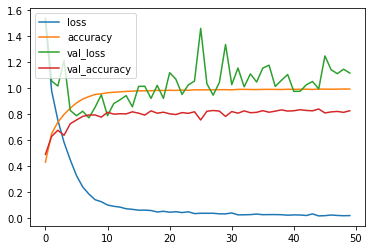

313/313 [==============================] - 2s 6ms/step - loss: 1.3565 - accuracy: 0.8134


[1.356466293334961, 0.8133999705314636]

In [14]:
pd.DataFrame(history.history).plot()
plt.show()

model.evaluate(X_test_cifar10, Y_test_cifar10)

In [15]:
checkpoint = keras.callbacks.ModelCheckpoint("simplified_cnn_cifar10.h5", save_best_only=True)
early_stopping = keras.callbacks.EarlyStopping(patience=25, restore_best_weights=True)
reduceLr = keras.callbacks.ReduceLROnPlateau()

model = keras.models.Sequential([
    keras.layers.Conv2D(32, 3, activation='relu', padding='same', input_shape=[32, 32, 3]),
    keras.layers.Conv2D(32, 3, activation='relu', padding='same'),
    keras.layers.MaxPooling2D(2),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.4),
    
    keras.layers.Conv2D(64, 2, activation='relu', padding='same'),
    keras.layers.Conv2D(64, 2, activation='relu', padding='same'),
    keras.layers.MaxPooling2D(2),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.2),
    
    keras.layers.Conv2D(128, 3, activation='relu', padding='same'),
    keras.layers.Conv2D(128, 3, activation='relu', padding='same'),
    keras.layers.MaxPooling2D(2),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.2),
    
    keras.layers.Conv2D(256, 3, activation='relu', padding='same'),
    keras.layers.Conv2D(256, 3, activation='relu', padding='same'),
    keras.layers.MaxPooling2D(2),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.2),
    
    keras.layers.Flatten(),    
    keras.layers.Dense(32, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.Adam(decay=0.0015),
              metrics=["accuracy"])

model.summary()

history = model.fit(X_train_cifar10, 
                    Y_train_cifar10, 
                    epochs=100,
                    batch_size=32,
                    validation_data=(X_valid_cifar10, Y_valid_cifar10),
                    callbacks=[checkpoint, early_stopping])

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
batch_normalization_12 (Batc (None, 16, 16, 32)        128       
_________________________________________________________________
dropout_5 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 16, 16, 64)        8256      
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 16, 16, 64)       

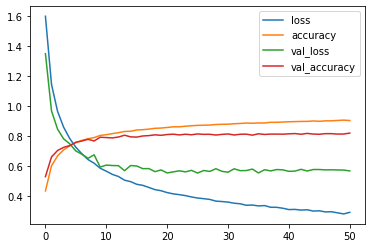

313/313 [==============================] - 1s 4ms/step - loss: 0.5981 - accuracy: 0.8082


[0.5980659127235413, 0.8082000017166138]

In [16]:
pd.DataFrame(history.history).plot()
plt.show()

model.evaluate(X_test_cifar10, Y_test_cifar10)

In [17]:
y_preds = model.predict(X_test_cifar10)
print(y_preds[1])
print(np.argmax(y_preds[1]))

[7.9646583e-05 1.4411930e-04 2.1872406e-06 6.1755736e-06 1.3166273e-06
 4.7640874e-06 7.8607337e-07 6.6647107e-07 9.9975449e-01 5.8065511e-06]
8


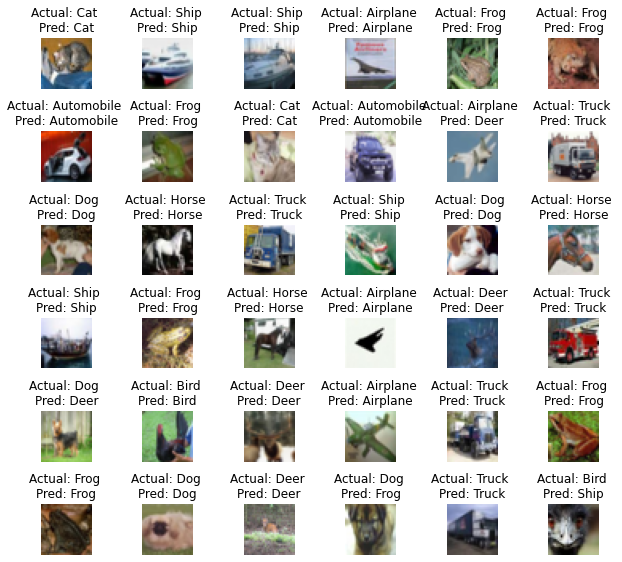

In [18]:
fig, ax = plt.subplots(6, 6, figsize=(10, 10))
ax = ax.ravel()

for i in range(0, 36):
    ax[i].imshow(X_test_cifar10[i])
    ax[i].set_title(f"Actual: {class_names[Y_test_cifar10[i][0]]} \nPred: {class_names[np.argmax(y_preds[i])]}")
    ax[i].axis('off')
    plt.subplots_adjust(wspace=1)
    
plt.show()

In [19]:
checkpoint = keras.callbacks.ModelCheckpoint("overcomplicated_cnn_model_cifar100.h5", save_best_only=True)
early_stopping = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)

model = keras.models.Sequential([
    keras.layers.Conv2D(32, 3, activation='relu', padding='same', input_shape=[32, 32, 3]),
    keras.layers.Conv2D(32, 3, activation='relu', padding='same'),
    keras.layers.MaxPooling2D(2),
    keras.layers.BatchNormalization(),
    
    keras.layers.Conv2D(64, 2, activation='relu', padding='same'),
    keras.layers.Conv2D(64, 2, activation='relu', padding='same'),
    keras.layers.MaxPooling2D(2),
    keras.layers.BatchNormalization(),
    
    keras.layers.Conv2D(128, 3, activation='relu', padding='same'),
    keras.layers.Conv2D(128, 3, activation='relu', padding='same'),
    keras.layers.MaxPooling2D(2),
    keras.layers.BatchNormalization(),
    
    keras.layers.Conv2D(256, 3, activation='relu', padding='same'),
    keras.layers.Conv2D(256, 3, activation='relu', padding='same'),
    keras.layers.BatchNormalization(),
    
    keras.layers.Conv2D(512, 3, activation='relu', padding='same'),
    keras.layers.Conv2D(512, 3, activation='relu', padding='same'),
    keras.layers.BatchNormalization(),
    
    keras.layers.Conv2D(1024, 3, activation='relu', padding='same'),
    keras.layers.Conv2D(1024, 3, activation='relu', padding='same'),
    keras.layers.BatchNormalization(),
    
    keras.layers.Flatten(),    
    keras.layers.Dense(256, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.BatchNormalization(),
    
    keras.layers.Dense(100, activation='softmax')
])

model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.Adam(decay=0.0015),
              metrics=["accuracy"])

model.summary()

history = model.fit(X_train_cifar100, Y_train_cifar100, 
                    epochs=50,
                    batch_size=32,
                    validation_data=(X_valid_cifar100, Y_valid_cifar100),
                    callbacks=[checkpoint])

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
batch_normalization_17 (Batc (None, 16, 16, 32)        128       
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 16, 16, 64)        8256      
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 16, 16, 64)        16448     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 8, 8, 64)         

1407/1407 [==============================] - 62s 44ms/step - loss: 0.0420 - accuracy: 0.9899 - val_loss: 4.2090 - val_accuracy: 0.3586
Epoch 31/50
1407/1407 [==============================] - 62s 44ms/step - loss: 0.0397 - accuracy: 0.9908 - val_loss: 4.2428 - val_accuracy: 0.3638
Epoch 32/50
1407/1407 [==============================] - 62s 44ms/step - loss: 0.0368 - accuracy: 0.9916 - val_loss: 4.2399 - val_accuracy: 0.3686
Epoch 33/50
1407/1407 [==============================] - 62s 44ms/step - loss: 0.0344 - accuracy: 0.9919 - val_loss: 4.3237 - val_accuracy: 0.3640
Epoch 34/50
1407/1407 [==============================] - 62s 44ms/step - loss: 0.0328 - accuracy: 0.9920 - val_loss: 4.2829 - val_accuracy: 0.3678
Epoch 35/50
1407/1407 [==============================] - 62s 44ms/step - loss: 0.0315 - accuracy: 0.9924 - val_loss: 4.3073 - val_accuracy: 0.3700
Epoch 36/50
1407/1407 [==============================] - 62s 44ms/step - loss: 0.0283 - accuracy: 0.9934 - val_loss: 4.3240 - val_

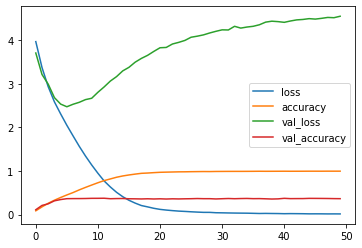

313/313 [==============================] - 4s 12ms/step - loss: 4.4852 - accuracy: 0.3788


[4.485170841217041, 0.37880000472068787]

In [20]:
pd.DataFrame(history.history).plot()
plt.show()

model.evaluate(X_test_cifar100, Y_test_cifar100)

In [21]:
checkpoint = keras.callbacks.ModelCheckpoint("simplified_cnn_model2.h5", save_best_only=True)
early_stopping = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)

model = keras.models.Sequential([
    keras.layers.Conv2D(64, 3, activation='relu', padding='same', input_shape=[32, 32, 3]),
    keras.layers.Conv2D(64, 3, activation='relu', padding='same'),
    keras.layers.MaxPooling2D(2),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.4),
    
    keras.layers.Conv2D(128, 2, activation='relu', padding='same'),
    keras.layers.Conv2D(128, 2, activation='relu', padding='same'),
    keras.layers.MaxPooling2D(2),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.2),
    
    keras.layers.Conv2D(256, 3, activation='relu', padding='same'),
    keras.layers.Conv2D(256, 3, activation='relu', padding='same'),
    keras.layers.MaxPooling2D(2),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.2),
    
    keras.layers.Flatten(),    
    keras.layers.Dense(64, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(100, activation='softmax')
])


model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.Adam(decay=0.0015),
              metrics=["accuracy"])

model.summary()

history = model.fit(X_train_cifar100, Y_train_cifar100, 
                    epochs=150,
                    batch_size=32,
                    validation_data=(X_valid_cifar100, Y_valid_cifar100),
                    callbacks=[checkpoint, early_stopping])


Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_28 (Conv2D)           (None, 32, 32, 64)        1792      
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 32, 32, 64)        36928     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 16, 16, 64)        0         
_________________________________________________________________
batch_normalization_25 (Batc (None, 16, 16, 64)        256       
_________________________________________________________________
dropout_10 (Dropout)         (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 16, 16, 128)       32896     
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 16, 16, 128)      

In [22]:
model.evaluate(X_test_cifar100, Y_test_cifar100)

313/313 [==============================] - 1s 4ms/step - loss: 1.7632 - accuracy: 0.5283


[1.7632451057434082, 0.5282999873161316]

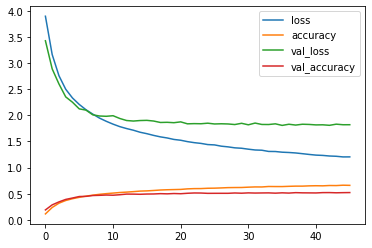

313/313 [==============================] - 1s 4ms/step - loss: 1.7632 - accuracy: 0.5283


[1.7632451057434082, 0.5282999873161316]

In [23]:
pd.DataFrame(history.history).plot()
plt.show()

model.evaluate(X_test_cifar100, Y_test_cifar100)

In [24]:
Y_train_cifar100 = keras.utils.to_categorical(Y_train_cifar100, 100)
Y_valid_cifar100 = keras.utils.to_categorical(Y_valid_cifar100, 100)
Y_test_cifar100 = keras.utils.to_categorical(Y_test_cifar100, 100)

In [25]:
train_datagen = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)

valid_datagen = ImageDataGenerator()
test_datagen = ImageDataGenerator()

train_generator = train_datagen.flow(X_train_cifar100, Y_train_cifar100, batch_size=32)
valid_generator = valid_datagen.flow(X_valid_cifar100, Y_valid_cifar100, batch_size=32)
test_generator = test_datagen.flow(X_test_cifar100, Y_test_cifar100, batch_size=32)

In [26]:
checkpoint = keras.callbacks.ModelCheckpoint("augmented_cnn_model2.h5", save_best_only=True)
early_stopping = keras.callbacks.EarlyStopping(patience=25, restore_best_weights=True)
reduceLr = keras.callbacks.ReduceLROnPlateau()

model = keras.models.Sequential([
    keras.layers.Conv2D(64, 3, activation='relu', padding='same', input_shape=[32, 32, 3]),
    keras.layers.Conv2D(64, 3, activation='relu', padding='same'),
    keras.layers.MaxPooling2D(2),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.2),
    
    keras.layers.Conv2D(128, 2, activation='relu', padding='same'),
    keras.layers.Conv2D(128, 2, activation='relu', padding='same'),
    keras.layers.MaxPooling2D(2),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.2),
    
    keras.layers.Conv2D(256, 3, activation='relu', padding='same'),
    keras.layers.Conv2D(256, 3, activation='relu', padding='same'),
    keras.layers.MaxPooling2D(2),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.2),
    
    keras.layers.Flatten(),    
    keras.layers.Dense(64, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(100, activation='softmax')
]) 


model.compile(loss="categorical_crossentropy",
              optimizer=keras.optimizers.Adam(),
              metrics=["accuracy", keras.metrics.TopKCategoricalAccuracy(k=3)])

model.summary()

history = model.fit(train_generator, 
                    epochs=150,
                    validation_data=valid_generator,
                    callbacks=[checkpoint, early_stopping, reduceLr])

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_34 (Conv2D)           (None, 32, 32, 64)        1792      
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 32, 32, 64)        36928     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 16, 16, 64)        0         
_________________________________________________________________
batch_normalization_29 (Batc (None, 16, 16, 64)        256       
_________________________________________________________________
dropout_14 (Dropout)         (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_36 (Conv2D)           (None, 16, 16, 128)       32896     
_________________________________________________________________
conv2d_37 (Conv2D)           (None, 16, 16, 128)      

Epoch 24/150
1407/1407 [==============================] - 18s 13ms/step - loss: 1.4739 - accuracy: 0.5899 - top_k_categorical_accuracy: 0.7937 - val_loss: 1.5085 - val_accuracy: 0.5794 - val_top_k_categorical_accuracy: 0.7868
Epoch 25/150
1407/1407 [==============================] - 18s 13ms/step - loss: 1.4576 - accuracy: 0.5900 - top_k_categorical_accuracy: 0.7984 - val_loss: 1.5234 - val_accuracy: 0.5808 - val_top_k_categorical_accuracy: 0.7832
Epoch 26/150
1407/1407 [==============================] - 18s 13ms/step - loss: 1.4438 - accuracy: 0.5933 - top_k_categorical_accuracy: 0.8013 - val_loss: 1.5389 - val_accuracy: 0.5780 - val_top_k_categorical_accuracy: 0.7756
Epoch 27/150
1407/1407 [==============================] - 18s 13ms/step - loss: 1.4318 - accuracy: 0.5957 - top_k_categorical_accuracy: 0.8034 - val_loss: 1.5393 - val_accuracy: 0.5854 - val_top_k_categorical_accuracy: 0.7794
Epoch 28/150
1407/1407 [==============================] - 18s 13ms/step - loss: 1.4060 - accurac

1407/1407 [==============================] - 18s 13ms/step - loss: 0.8162 - accuracy: 0.7542 - top_k_categorical_accuracy: 0.9128 - val_loss: 1.2793 - val_accuracy: 0.6612 - val_top_k_categorical_accuracy: 0.8406


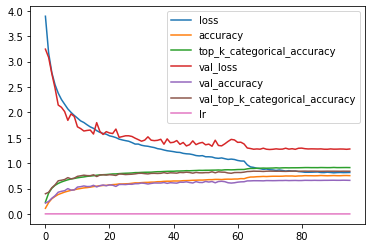

In [27]:
pd.DataFrame(history.history).plot()
plt.show()

In [28]:
model.evaluate(test_generator)

313/313 [==============================] - 1s 4ms/step - loss: 1.2476 - accuracy: 0.6698 - top_k_categorical_accuracy: 0.8434


[1.2475606203079224, 0.6697999835014343, 0.8434000015258789]

In [31]:
classnames = ['apple', 'aquarium_fish', 'baby', 'bear', 'beaver',
              'bed', 'bee', 'beetle', 'bicycle', 'bottle',
              'bowl', 'boy', 'bridge', 'bus', 'butterfly',
              'camel', 'can', 'castle', 'caterpillar', 'cattle',
              'chair', 'chimpanzee', 'clock', 'cloud', 'cockroach',
              'couch', 'crab', 'crocodile', 'cup', 'dinosaur', 
              'dolphin', 'elephant', 'flatfish', 'forest', 'fox',
              'girl', 'hamster', 'house', 'kangaroo', 'computer_keyboard',
              'lamp', 'lawn_mower', 'leopard', 'lion', 'lizard', 
              'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain',
              'mouse', 'mushroom', 'oak_tree', 'orange', 'orchid',
              'otter', 'palm_tree', 'pear', 'pickup_truck', 'pine_tree',
              'plain', 'plate', 'poppy', 'porcupine', 'possum',
              'rabbit', 'raccoon', 'ray', 'road', 'rocket',
              'rose', 'sea', 'seal', 'shark', 'shrew', 
              'skunk', 'skyscraper', 'snail', 'snake', 'spider',
              'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 'table',
              'tank', 'telephone', 'television', 'tiger', 'tractor',
              'train', 'trout', 'tulip', 'turtle', 'wardrobe',
              'whale', 'willow_tree', 'wolf', 'woman', 'worm',]

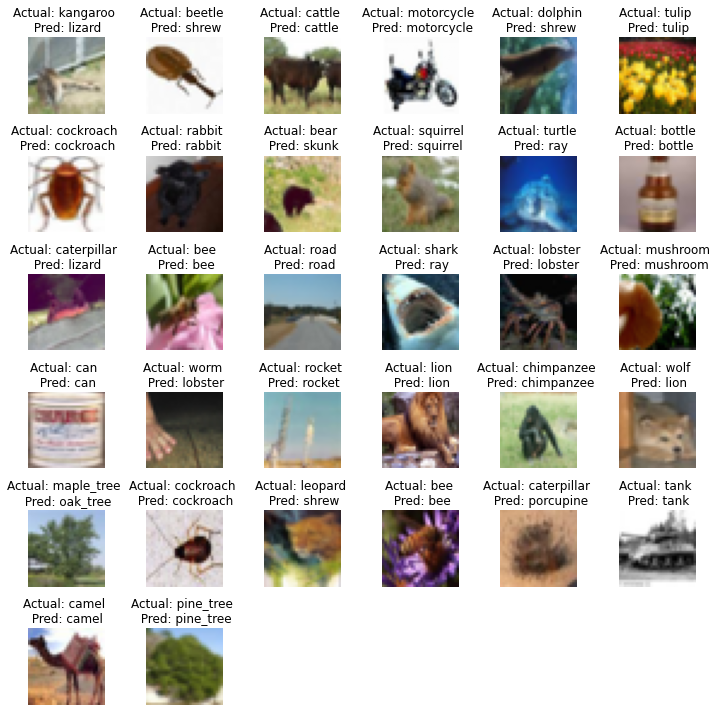

In [32]:
batch = next(test_generator)

images = batch[0]
labels = batch[1]

fig = plt.figure(figsize=(10, 10))

for index, image in enumerate(images):
    ax = fig.add_subplot(6, 6, index+1)
    plt.imshow(image)
    
    image = np.expand_dims(image, 0)
    pred = model.predict(image)
    pred = np.squeeze(pred)
    
    label = np.argmax(labels[index])
    pred_index = np.argmax(pred)
    
    ax.set_title(f'Actual: {classnames[label]} \n Pred: {classnames[pred_index]}')
    ax.axis('off')
    
plt.tight_layout()
plt.show()